<a href="https://colab.research.google.com/github/Idam-Bali-Haryono/Machine-Learning-Project-1/blob/main/ML(catboost_%2B_upgini)_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
DATADIR = os.path.join(MOUNTPOINT, 'My Drive')
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [18]:
%pip install -Uq upgini catboost

In [19]:
import pandas as pd

df_path = "/content/gdrive/MyDrive/projects_data/train.csv"
df = pd.read_csv(df_path)
df.head(10)


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
df_sample = df.dropna().sample(n=9_000, random_state=0)
df_sample['store'] = df_sample['store'].astype(str)
df_sample['item'] = df_sample['item'].astype(str)

df_sample['date'] = pd.to_datetime(df_sample['date'])
df_sample.sort_values(['date'], inplace=True)
df_sample.reset_index(inplace=True, drop=True)

df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    9000 non-null   datetime64[ns]
 1   store   9000 non-null   object        
 2   item    9000 non-null   object        
 3   sales   9000 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 281.4+ KB


In [22]:
train = df_sample[df['date'] < '2017-01-01']
test = df_sample[df['date'] >= '2017-01-01']

train_features = train.drop(columns=['sales'])
train_target = train['sales']
test_features = test.drop(columns=['sales'])
test_target = test['sales']


<ipython-input-22-57e7fcde9982>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train = df_sample[df['date'] < '2017-01-01']
<ipython-input-22-57e7fcde9982>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = df_sample[df['date'] >= '2017-01-01']


In [23]:
train_features.head()

,date,store,item
0,2013-01-01,2,3
1,2013-01-01,10,21
2,2013-01-01,3,12
3,2013-01-01,3,27
4,2013-01-01,5,24


In [24]:
from upgini import FeaturesEnricher, SearchKey
from upgini.metadata import CVType

enricher = FeaturesEnricher(
    search_keys= {
        "date": SearchKey.DATE,
    },
    cv = CVType.time_series
)

enricher.fit(train_features,
             train_target,
             eval_set =  [(test_features, test_target)])

[============================================================] 100% Finished


Try to add other keys like the COUNTRY, POSTAL_CODE, PHONE NUMBER, EMAIL/HEM, IPv4 to your training dataset
for search through all the available data sources.
See docs https://github.com/upgini/upgini#-total-239-countries-and-up-to-41-years-of-history
Detected task type: ModelTaskType.REGRESSION




Column name,Status,Errors
date,All valid,-
target,All valid,-



Running search request, search_id=04011964-f90d-4bf1-afc3-97f582a1d4dc
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com


38 relevant feature(s) found with the search keys: ['date']


f_weather_date_weather_umap_34_c3ef5b4f,0.0826,100.0000,"4.7649, 4.7161, 4.8142",Upgini,Weather & climate normals data,Daily
f_autofe_div_196f74a8,0.0177,100.0000,"-1.6011, -0.5278, -0.7102",Upgini,AutoFE: features from Calendar data,Daily
f_autofe_mul_af6d166b,0.0099,100.0000,"-0.2688, -0.7496, -0.6185",Upgini,"AutoFE: features from Calendar data,Markets data",Daily
f_weather_date_weather_umap_30_898d12c4,0.0081,100.0000,"4.8085, 5.1064, 5.2082",Upgini,Weather & climate normals data,Daily
f_autofe_div_0dcebab1,0.0066,100.0000,"1.018, 1.0413, 1.0266",Upgini,AutoFE: features from Markets data,Daily
f_weather_date_weather_umap_14_63480984,0.0052,100.0000,"4.8239, 4.1272, 4.9594",Upgini,Weather & climate normals data,Daily
f_weather_date_weather_umap_13_842ae1fc,0.0051,100.0000,"4.9441, 4.766, 5.2244",Upgini,Weather & climate normals data,Daily
f_autofe_mul_b2bfad41,0.0045,100.0000,"-0.25, 0.5563, 0.513",Upgini,"AutoFE: features from Calendar data,Markets data",Daily
f_autofe_div_fd05a66d,0.0042,100.0000,"1.0542, 1.0734, 0.9442",Upgini,AutoFE: features from Markets data,Daily
f_autofe_div_3e22df83,0.0040,100.0000,"-0.0096, -0.0085, -0.0175",Upgini,"AutoFE: features from Calendar data,Markets data",Daily
f_autofe_mul_f5777239,0.0038,100.0000,"-0.5317, 0.5702, -0.3884",Upgini,"AutoFE: features from Calendar data,Markets data",Daily


Upgini,Weather & climate normals data,0.1125,11
Upgini,"AutoFE: features from Calendar data,Markets data",0.0417,19
Upgini,AutoFE: features from Calendar data,0.0198,2
Upgini,AutoFE: features from Markets data,0.0147,6


Calendar data,f_autofe_div_196f74a8,f_events_date_year_sin1_3c44bc64,f_events_date_year_sin2_59955ffd,/
"Calendar data,Markets data",f_autofe_mul_af6d166b,f_events_date_week_cos3_7525fe31,f_financial_date_vix_7d_to_1y_634c77eb,*
Markets data,f_autofe_div_0dcebab1,f_financial_date_nasdaq_7d_to_1y_b00bfaa7,f_financial_date_snp500_7d_to_1y_378b9f99,/
"Calendar data,Markets data",f_autofe_mul_b2bfad41,f_events_date_week_cos2_b0a07cfc,f_financial_date_vix_7d_to_1y_634c77eb,*
Markets data,f_autofe_div_fd05a66d,f_financial_date_dow_jones_7d_to_1y_6106ea75,f_financial_date_gold_7d_to_1y_ae310379,/
"Calendar data,Markets data",f_autofe_div_3e22df83,f_events_date_week_sin1_847b5db1,f_financial_date_crude_oil_1f195998,/
"Calendar data,Markets data",f_autofe_mul_f5777239,f_events_date_week_sin1_847b5db1,f_financial_date_natural_gas_7d_to_7d_1y_shift_a5c3c07f,*
"Calendar data,Markets data",f_autofe_mul_16f51329,f_events_date_week_sin1_847b5db1,f_financial_date_gold_7d_to_7d_1y_shift_a8127a43,*
"Calendar data,Markets data",f_autofe_mul_21f21640,f_events_date_week_sin1_847b5db1,f_financial_date_natural_gas_92dac942,*
"Calendar data,Markets data",f_autofe_mul_25296268,f_events_date_week_sin1_847b5db1,f_financial_date_vix_7d_to_1y_634c77eb,*
Calendar data,f_autofe_mul_041b52f4,f_events_date_week_sin1_847b5db1,f_events_date_year_sin1_3c44bc64,*



Examples of outliers with maximum value of target:
15    205
7     196
19    176
Name: target, dtype: int64
Outliers will be excluded during the metrics calculation.
Calculating accuracy uplift after enrichment...

which makes metrics between the train and eval_set incomparable.


Train,7305,54.0215,358.8011,266.7778,92.0233
Eval 1,1695,44.0661,205.6715,187.2734,18.3981


In [25]:
from catboost import CatBoostRegressor
from catboost.utils import eval_metric

model = CatBoostRegressor(verbose=False, allow_writing_files=False, random_state=0)

enricher.calculate_metrics(
    train_features, train_target, eval_set=[(test_features, test_target)],
    estimator =  model,
    scoring = "mean_absolute_percentage_error"

)

Calculating accuracy uplift after enrichment...
-
which makes metrics between the train and eval_set incomparable.


,Dataset type,Rows,Mean target,Baseline mean_absolute_percentage_error,Enriched mean_absolute_percentage_error,Uplift
0,Train,7305,54.0215,0.240629,0.165222,0.075407
1,Eval 1,1695,44.0661,0.311178,0.213886,0.097292


In [26]:
df['store'] = df_sample['store'].astype(str)
df['item'] = df_sample['item'].astype(str)

df['date'] = pd.to_datetime(df_sample['date'])
df.sort_values(['date'], inplace=True)
df.reset_index(inplace=True, drop=True)

forlayout1 = df.drop(columns=['sales'], axis=1)
forlayout1 = forlayout1.dropna()

df_layout=df.dropna()

enriched_train_features = enricher.transform(train_features, keep_input=True)
enriched_test_features = enricher.transform(test_features, keep_input=True)
enriched_layout        = enricher.transform(forlayout1, keep_input=True)

[============================================================] 100% Finished

You use Trial access to Upgini data enrichment. Limit for Trial: 10000 rows. You have already enriched: 0 rows.

Try to add other keys like the COUNTRY, POSTAL_CODE, PHONE NUMBER, EMAIL/HEM, IPv4 to your training dataset
for search through all the available data sources.
See docs https://github.com/upgini/upgini#-total-239-countries-and-up-to-41-years-of-history



Column name,Status,Errors
date,All valid,-



Running search request, search_id=93e6da44-7684-43ce-81dd-0878c0a11dd7
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com

Retrieving selected features from data sources...


[============================================================] 100% Finished

You use Trial access to Upgini data enrichment. Limit for Trial: 10000 rows. You have already enriched: 0 rows.

Try to add other keys like the COUNTRY, POSTAL_CODE, PHONE NUMBER, EMAIL/HEM, IPv4 to your training dataset
for search through all the available data sources.
See docs https://github.com/upgini/upgini#-total-239-countries-and-up-to-41-years-of-history



Column name,Status,Errors
date,All valid,-



Running search request, search_id=dd6622d2-62c9-437f-8770-016c844d8bc9
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com

Retrieving selected features from data sources...


[============================================================] 100% Finished

You use Trial access to Upgini data enrichment. Limit for Trial: 10000 rows. You have already enriched: 0 rows.

Try to add other keys like the COUNTRY, POSTAL_CODE, PHONE NUMBER, EMAIL/HEM, IPv4 to your training dataset
for search through all the available data sources.
See docs https://github.com/upgini/upgini#-total-239-countries-and-up-to-41-years-of-history



Column name,Status,Errors
date,All valid,-



Running search request, search_id=344ad6f5-52ba-4b75-8943-75f54c03a119
We'll send email notification once it's completed, just use your personal api_key from profile.upgini.com

Retrieving selected features from data sources...


In [27]:
enriched_train_features.head()

,date,store,item,f_weather_date_weather_umap_34_c3ef5b4f,f_autofe_div_196f74a8,f_autofe_mul_af6d166b,f_weather_date_weather_umap_30_898d12c4,f_autofe_div_0dcebab1,f_weather_date_weather_umap_14_63480984,f_weather_date_weather_umap_13_842ae1fc,...,f_autofe_div_c9e01d9d,f_autofe_mul_27877f4b,f_autofe_div_d97c0c97,f_autofe_mul_cfe58f95,f_autofe_mul_cde6a94a,f_weather_date_weather_umap_36_9ecda500,f_autofe_div_399cc92a,f_weather_date_weather_umap_43_36116dd1,f_autofe_div_ff73d45e,f_autofe_mul_df98a323
0,2013-01-01,2,3,5.664261,0.507501,-1.036025,4.613565,0.981909,5.366709,3.775319,...,0.630571,0.37786,1.034182,1.138576,0.699999,4.804313,-0.747547,5.079482,0.944754,-0.906428
1,2013-01-01,10,21,5.664261,0.507501,-1.036025,4.613565,0.981909,5.366709,3.775319,...,0.630571,0.37786,1.034182,1.138576,0.699999,4.804313,-0.747547,5.079482,0.944754,-0.906428
2,2013-01-01,3,12,5.664261,0.507501,-1.036025,4.613565,0.981909,5.366709,3.775319,...,0.630571,0.37786,1.034182,1.138576,0.699999,4.804313,-0.747547,5.079482,0.944754,-0.906428
3,2013-01-01,3,27,5.664261,0.507501,-1.036025,4.613565,0.981909,5.366709,3.775319,...,0.630571,0.37786,1.034182,1.138576,0.699999,4.804313,-0.747547,5.079482,0.944754,-0.906428
4,2013-01-01,5,24,5.664261,0.507501,-1.036025,4.613565,0.981909,5.366709,3.775319,...,0.630571,0.37786,1.034182,1.138576,0.699999,4.804313,-0.747547,5.079482,0.944754,-0.906428


In [28]:
model.fit(train_features,train_target)
preds = model.predict(forlayout1)
df_layout['predictions'] = preds

#eval_metric(test_target.values, preds, 'SMAPE')



<ipython-input-28-2641e91977f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_layout['predictions'] = preds


In [29]:
model.fit(enriched_train_features,train_target)
enriched_preds = model.predict(enriched_layout )
df_layout['Epredictions'] = enriched_preds

#eval_metric(test_target.values, enriched_preds, 'SMAPE')

<ipython-input-29-ebaf0958d451>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_layout['Epredictions'] = enriched_preds


In [30]:
df_layout.head()




,date,store,item,sales,predictions,Epredictions
0,2013-01-01,2,3,13,24.796236,20.802340
1,2013-01-01,10,21,11,27.434279,23.665512
2,2013-01-01,3,12,14,45.676412,45.792462
3,2013-01-01,3,27,13,9.311221,8.898677
4,2013-01-01,5,24,10,34.185360,30.480327


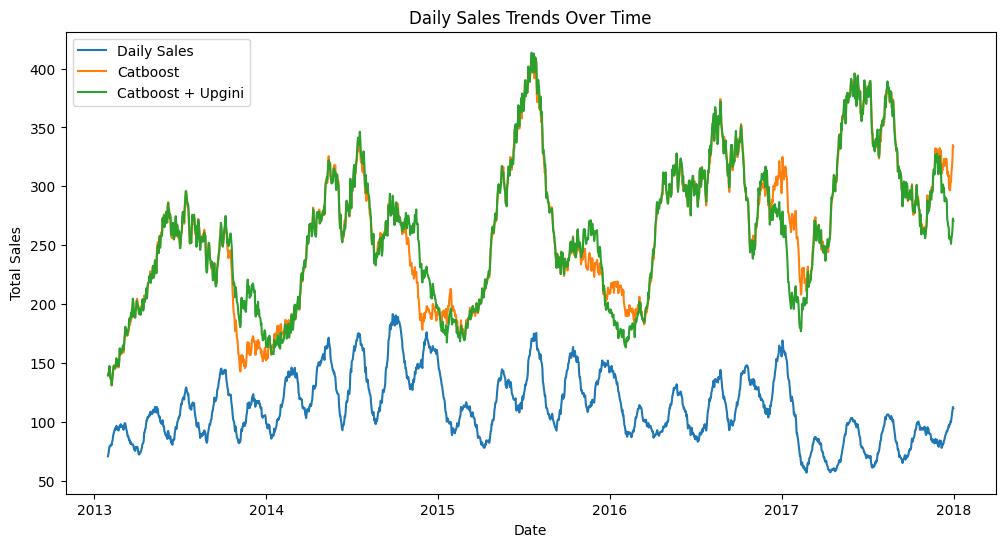

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

daily_sales = df_layout.groupby('date')['sales'].sum().rolling(window=30).mean()
preds       = df_layout.groupby('date')['predictions'].sum().rolling(window=30).mean()
epreds      = df_layout.groupby('date')['Epredictions'].sum().rolling(window=30).mean()

# Plotting daily sales trends
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.plot(preds.index, preds.values, label='Catboost')
plt.plot(epreds.index, epreds.values, label='Catboost + Upgini')

plt.title('Daily Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()